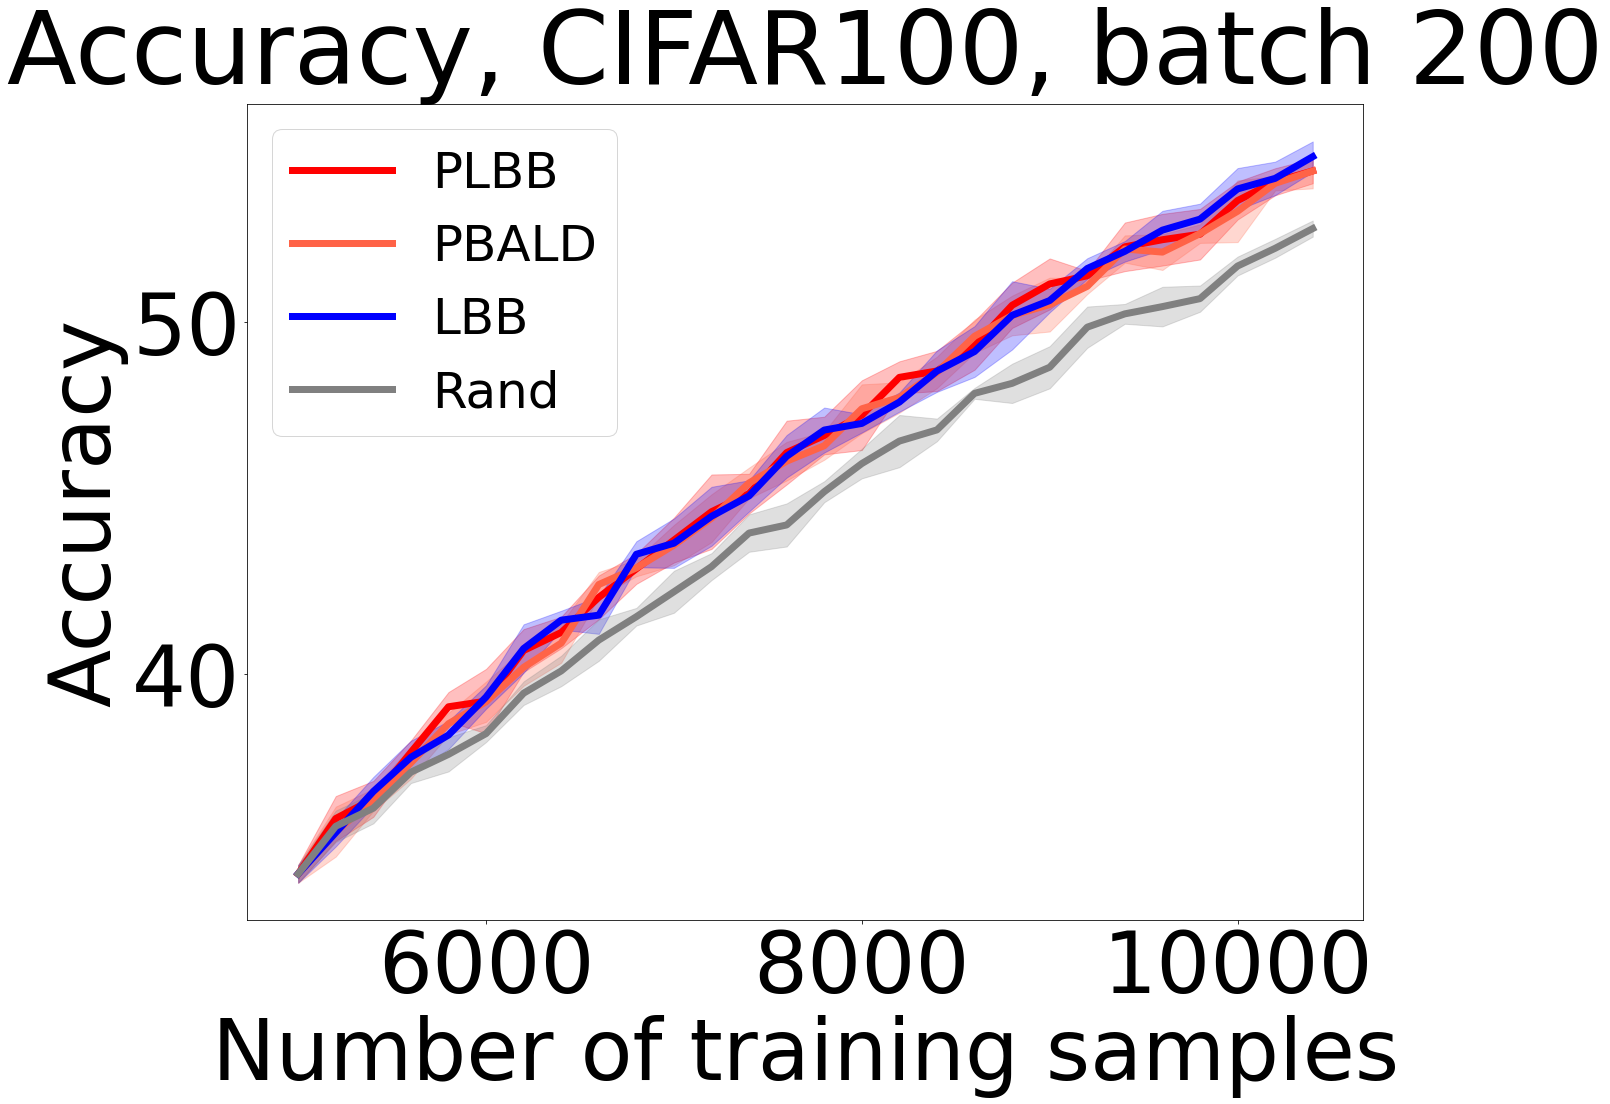

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import statistics

# from matplotlib import rc
plt.figure(figsize=(20, 15))
# matplotlib.rcParams['text.usetex'] = True
# rc('text', usetex=True)
matplotlib.rcParams['font.size'] = 85

uns_type = 'ENS'
dataset_name = 'CIFAR100'
acquisition_batch_size = 200
random_seeds = [42, 227, 346, 684, 920]
algs = ['PLBB', 'PBALD', 'LBB', 'Rand'] 
num_initial_samples = 5000
max_training_samples = 10400
PATH = 'results/' + uns_type + '/' + dataset_name + '/' + str(acquisition_batch_size) + '/'

alg_colors = {
    'PLBB': 'red',
    'PBALD': 'tomato',
    'LBB': 'blue', 
    'BALD': 'royalblue',
    'BB': 'g',
    'Rand': 'grey',
    }

for alg in algs:
    accuracy_list = []
    for random_seed in random_seeds:
        df = pd.read_csv('results/' + uns_type + "/" + dataset_name + "/" + str(acquisition_batch_size) + "/" + alg + str(random_seed) + ".csv")
        accuracy_list.append(df['Test accuracy'][df['Number of samples'] <= max_training_samples])
    mean = []
    std = []
    for i in range(len(accuracy_list[0])):
        mean.append(np.mean([acc_list[i] for acc_list in accuracy_list]))
        std.append(np.std([acc_list[i] for acc_list in accuracy_list]))
    mean = np.array(mean)
    std = np.array(std)
    plt.plot(np.arange(num_initial_samples, max_training_samples + acquisition_batch_size - 1, acquisition_batch_size), mean, alg_colors[alg], label=alg, linewidth=7.0)
    plt.fill_between(np.arange(num_initial_samples, max_training_samples + acquisition_batch_size - 1, acquisition_batch_size), mean-std, mean+std, alpha=0.25, color=alg_colors[alg])


plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.title("Accuracy, " + dataset_name + ", batch " + str(acquisition_batch_size))
plt.legend(fontsize=50)
plt.show()
# plt.tight_layout()
# plt.savefig(PATH + '/' + uns_type.lower() + '_' + dataset_name.lower() + '_batch' + str(acquisition_batch_size) + '.pdf', bbox_inches='tight')